In [10]:
import pandas as pd
A=pd.read_csv("50_Startups.csv")

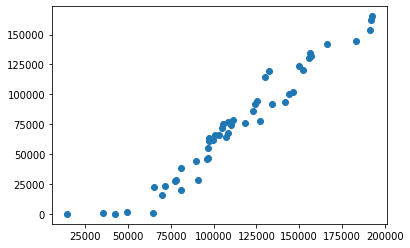

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(A.PROFIT,A.RND)

In [12]:
A.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [13]:
X=A[["RND"]]
Y=A[["PROFIT"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

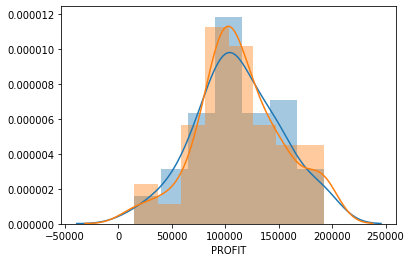

In [14]:
import seaborn as sb
sb.distplot(A.PROFIT)
sb.distplot(ytrain.PROFIT)

In [16]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)

In [17]:
pred=model.predict(xtest)

In [18]:
ytest['PREDICTED_profit']=pred
ytest['Actual_values_RND']=xtest

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
ytest

,PROFIT,PREDICTED_profit,Actual_values_RND
13,134307.35,127356.235000,91992.39
44,65200.33,67757.981304,22177.74
47,42559.73,48825.642963,0.00
43,69758.98,62062.326529,15505.73
41,77798.83,72636.824749,27892.92
8,152211.77,151728.453306,120542.52
5,156991.12,161404.205526,131876.90
12,141585.52,128953.747671,93863.75
22,110352.25,111992.135369,73994.56
27,105008.31,110381.305539,72107.60


In [20]:
for i in xtest.RND:
    print(46820+(0.8913*i))

128812.817207
66587.019662
46820.0
60640.257149
71680.959596
154259.548076
164361.88097
130480.760375
112771.35132799999
111089.50388


Text(0, 0.5, 'PROFIT')

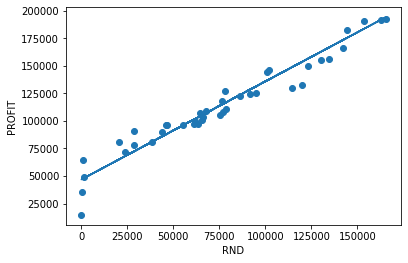

In [21]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,46820 + (0.8913 * xtrain))
plt.xlabel("RND")
plt.ylabel("PROFIT")

In [22]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RND       50 non-null float64
ADMIN     50 non-null float64
MKT       50 non-null float64
STATE     50 non-null object
PROFIT    50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [23]:
import statsmodels.api as sm
xconst=sm.add_constant(xtrain)
est=sm.OLS(ytrain,xconst)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 PROFIT   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     595.3
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           8.08e-25
Time:                        23:53:14   Log-Likelihood:                -424.50
No. Observations:                  40   AIC:                             853.0
Df Residuals:                      38   BIC:                             856.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.883e+04   3098.090     15.760      0.0

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
pd.unique(A.STATE)

array(['New York', 'California', 'Florida'], dtype=object)

In [25]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [26]:
ytest['prdicted_profit']=pred

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
ytest

,PROFIT,PREDICTED_profit,Actual_values_RND,prdicted_profit
13,134307.35,127356.235000,91992.39,127356.235000
44,65200.33,67757.981304,22177.74,67757.981304
47,42559.73,48825.642963,0.00,48825.642963
43,69758.98,62062.326529,15505.73,62062.326529
41,77798.83,72636.824749,27892.92,72636.824749
8,152211.77,151728.453306,120542.52,151728.453306
5,156991.12,161404.205526,131876.90,161404.205526
12,141585.52,128953.747671,93863.75,128953.747671
22,110352.25,111992.135369,73994.56,111992.135369
27,105008.31,110381.305539,72107.60,110381.305539


In [28]:
from sklearn.metrics import mean_absolute_error 
MAE=mean_absolute_error(ytest['PROFIT'],ytest["prdicted_profit"])

In [29]:
MAE

5317.439344490075

In [30]:
print("model error is %.2f" %MAE)

model error is 5317.44


Text(0.5, 0, 'RND')

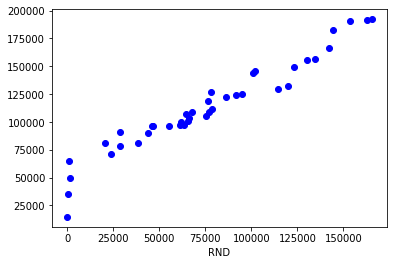

In [31]:
b0=model.intercept_
b1=model.coef_
plt.scatter(xtrain,ytrain,c="blue")
plt.xlabel("RND")
